In [9]:
!pip install sqlalchemy

In [10]:
!pip install tomli

In [11]:
!pip install psycopg2-binary

In [12]:
!pip install sentence-transformers umap-learn

Cell 1 – imports & config

In [13]:
import sys
from pathlib import Path
import pandas as pd
import numpy as np

PROJECT_ROOT = Path("..").resolve()
if str(PROJECT_ROOT) not in sys.path:
    sys.path.insert(0, str(PROJECT_ROOT))

from src.data.loader import get_db_engine
from src.config import load_config

# Load config
cfg = load_config()
jobs_cfg = cfg['jobs']
table = jobs_cfg['table_name'] #'job_postings"

# Load CSV 
df = pd.read_csv('C:\\Users\\hisuk\\labor-market-nlp-prototype\\data\\raw\\companies_merged.csv')

print("Rows:", df.shape[0])
print(df.columns)

# Save to PostgreSQL
engine = get_db_engine()
df.to_sql(table, engine, if_exists='replace', index=False)

print("DB Load Complete!")


Rows: 24165
Index(['company_id', 'name', 'description', 'company_size', 'state', 'country',
       'city', 'zip_code', 'address', 'url', 'industry', 'speciality',
       'employee_count', 'follower_count', 'time_recorded'],
      dtype='object')
DB Load Complete!


In [14]:

import matplotlib.pyplot as plt
import seaborn as sns


plt.rcParams["figure.figsize"] = (10, 5)
sns.set()


Cell 2 – load a sample of jobs

In [15]:
from src.data.loader import load_jobs

jobs = load_jobs(limit=2000)
jobs.head()


,company_id,name,description,company_size,state,country,city,zip_code,address,url,industry,speciality,employee_count,follower_count,time_recorded
0,1009,IBM,"At IBM, we do more than work. We create. We cr...",7.0,NY,US,"Armonk, New York",10504,International Business Machines Corp.,https://www.linkedin.com/company/ibm,IT Services and IT Consulting,Cloud,314102,16253625,1712378162
1,1016,GE HealthCare,Every day millions of people feel the impact o...,7.0,0,US,Chicago,0,-,https://www.linkedin.com/company/gehealthcare,Hospitals and Health Care,Healthcare,56873,2185368,1712382540
2,1025,Hewlett Packard Enterprise,Official LinkedIn of Hewlett Packard Enterpris...,7.0,Texas,US,Houston,77389,1701 E Mossy Oaks Rd Spring,https://www.linkedin.com/company/hewlett-packa...,IT Services and IT Consulting,None,79528,3586194,1712870106
3,1028,Oracle,We’re a cloud technology company that provides...,7.0,Texas,US,Austin,78741,2300 Oracle Way,https://www.linkedin.com/company/oracle,IT Services and IT Consulting,enterprise,192099,9465968,1712642952
4,1033,Accenture,Accenture is a leading global professional ser...,7.0,0,IE,Dublin 2,0,Grand Canal Harbour,https://www.linkedin.com/company/accenture,Business Consulting and Services,Management Consulting,574664,11864908,1712641699


Cell 3 – basic info

In [16]:
jobs.info()
jobs.describe(include="all").transpose().head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   company_id      1999 non-null   int64  
 1   name            1999 non-null   object 
 2   description     1999 non-null   object 
 3   company_size    1978 non-null   float64
 4   state           1999 non-null   object 
 5   country         1999 non-null   object 
 6   city            1999 non-null   object 
 7   zip_code        1998 non-null   object 
 8   address         1999 non-null   object 
 9   url             1999 non-null   object 
 10  industry        1993 non-null   object 
 11  speciality      1702 non-null   object 
 12  employee_count  1999 non-null   int64  
 13  follower_count  1999 non-null   int64  
 14  time_recorded   1999 non-null   int64  
dtypes: float64(1), int64(4), object(10)
memory usage: 234.4+ KB


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
company_id,1999.0,NaN,NaN,NaN,1116218.808404,8103863.581294,1009.0,3851.0,6915.0,10764.0,103129573.0
name,1999,1999,IBM,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
description,1999,1999,"At IBM, we do more than work. We create. We cr...",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
company_size,1978.0,NaN,NaN,NaN,5.821031,1.360369,1.0,5.0,6.0,7.0,7.0
state,1999,247,0,185,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,1999,34,US,1640,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city,1999,760,New York,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zip_code,1998,1303,0,157,NaN,NaN,NaN,NaN,NaN,NaN,NaN
address,1999,1845,0,121,NaN,NaN,NaN,NaN,NaN,NaN,NaN
url,1999,1999,https://www.linkedin.com/company/ibm,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Cell 4 – text length distribution

In [21]:
RESULTS_DIR = PROJECT_ROOT / "results"
GRAPH_DIR = RESULTS_DIR / "graphs"

GRAPH_DIR.mkdir(parents=True, exist_ok=True)

text_col = "description"  # adjust if needed

jobs["text_len"] = jobs[text_col].astype(str).str.len()

# Create figure
plt.figure(figsize=(10, 6))
sns.histplot(jobs["text_len"], bins=50)
plt.title("Distribution of job description length")
plt.xlabel("Character count")
plt.ylabel("Number of jobs")

# Save instead of just showing
save_path = GRAPH_DIR / "job_description_length_hist.png"
plt.savefig(save_path, dpi=200, bbox_inches="tight")
plt.close()

print(f"Histogram saved to: {save_path}")


Histogram saved to: C:\Users\hisuk\labor-market-nlp-prototype\results\graphs\job_description_length_hist.png


Cell 5 – top job titles / locations

In [ ]:
if "city" in jobs.columns:
    display(jobs["city"].value_counts().head(20))


city
New York         142
Chicago           56
Atlanta           48
Boston            42
Washington        42
0                 40
London            37
San Francisco     28
Austin            22
Dallas            22
San Jose          19
Houston           19
Los Angeles       19
Minneapolis       18
Seattle           16
San Diego         16
Denver            16
Columbus          15
Philadelphia      15
Pittsburgh        14
Name: count, dtype: int64

Cell 6 – quick embedding + scatter

If you want a very simple demo for the client:

Batches: 100%|██████████| 63/63 [01:13<00:00,  1.17s/it]
c:\Users\hisuk\AppData\Local\Programs\Python\Python313\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


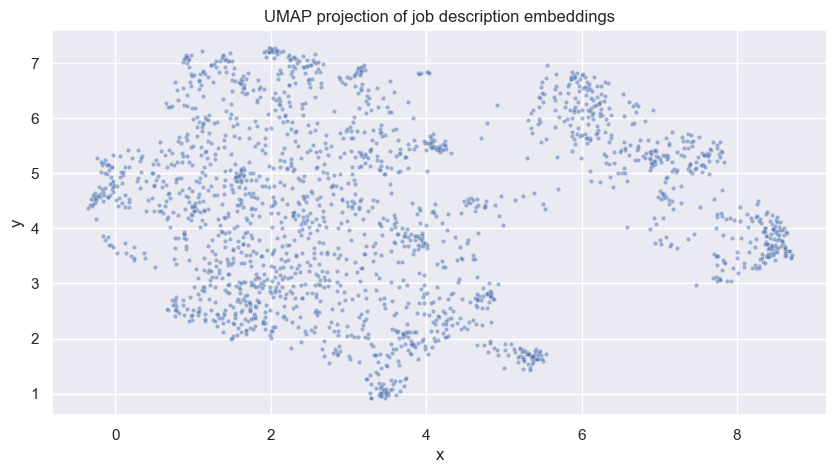

Saved to C:\Users\hisuk\labor-market-nlp-prototype\results\graphs\umap_job_embeddings.png


In [22]:
from sentence_transformers import SentenceTransformer
import umap

model = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")

# pick a text column name you actually have, e.g. "description"
text_col = "description"  

n = min(len(jobs), 2000)
sample = jobs.sample(n, random_state=42)

emb = model.encode(sample[text_col].tolist(), show_progress_bar=True)

reducer = umap.UMAP(random_state=42)
emb_2d = reducer.fit_transform(emb)

sample["x"] = emb_2d[:, 0]
sample["y"] = emb_2d[:, 1]

sns.scatterplot(
    data=sample,
    x="x",
    y="y",
    alpha=0.5,
    s=10,
)
plt.title("UMAP projection of job description embeddings")

# Save FIRST
save_path = GRAPH_DIR / "umap_job_embeddings.png"
plt.savefig(save_path, dpi=200, bbox_inches="tight")

# Then show
plt.show()
plt.close()

print(f"Saved to {save_path}")